<a href="https://colab.research.google.com/github/muthamlikitha/Data-Science-Projects/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set()

In [16]:
df=pd.read_csv('/content/Dim_User1.csv')
df_csv=pd.read_csv('/content/Fact_Netflix_Usage1.csv')

df.head()

,User ID,Gender,Device,Country,FamilyMember,Age,TimeConsumingPerWeek,Genre,Satisfaction,MontlyIncomeUSD
0,1,Male,Smartphone,United States,5,21,9,Horror,Satisfied,900
1,2,Female,Tablet,Canada,5,17,7,Comedy,Extremely satisfied,700
2,3,Male,Smart TV,United Kingdom,3,22,8,Action & Adventure,Neutral,800
3,4,Female,Laptop,Australia,4,24,8,Horror,Extremely satisfied,600
4,5,Male,Smartphone,Germany,2,23,9,Action & Adventure,Extremely satisfied,1000


In [17]:
df.tail()

,User ID,Gender,Device,Country,FamilyMember,Age,TimeConsumingPerWeek,Genre,Satisfaction,MontlyIncomeUSD
819,820,Female,Tablet,United States,1,67,2,Comedy,Neutral,3500
820,821,Female,Laptop,United States,1,50,1,Others,Extremely satisfied,3900
821,822,Male,Laptop,Canada,4,46,1,Action & Adventure,Satisfied,3600
822,823,Male,Smartphone,United Kingdom,1,62,2,Horror,Dissatisfied,3400
823,824,Female,Smartphone,Australia,1,56,1,Horror,Neutral,4200


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   User ID               824 non-null    int64 
 1   Gender                824 non-null    object
 2   Device                824 non-null    object
 3   Country               824 non-null    object
 4   FamilyMember          824 non-null    int64 
 5   Age                   824 non-null    int64 
 6   TimeConsumingPerWeek  824 non-null    int64 
 7   Genre                 824 non-null    object
 8   Satisfaction          824 non-null    object
 9   MontlyIncomeUSD       824 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 64.5+ KB


In [19]:
df_csv.head()

,User ID,Join Date,Last Payment Date,SubscriptionID,Monthly Revenue
0,1,15-01-2022,10-06-2023,1,10
1,2,05-09-2021,22-06-2023,3,15
2,3,28-02-2023,27-06-2023,2,12
3,4,10-07-2022,26-06-2023,2,12
4,5,01-05-2023,28-06-2023,1,10


In [20]:
merged_df = pd.merge(df_csv, df, on='User ID', how='inner')
display(merged_df.head())

,User ID,Join Date,Last Payment Date,SubscriptionID,Monthly Revenue,Gender,Device,Country,FamilyMember,Age,TimeConsumingPerWeek,Genre,Satisfaction,MontlyIncomeUSD
0,1,15-01-2022,10-06-2023,1,10,Male,Smartphone,United States,5,21,9,Horror,Satisfied,900
1,2,05-09-2021,22-06-2023,3,15,Female,Tablet,Canada,5,17,7,Comedy,Extremely satisfied,700
2,3,28-02-2023,27-06-2023,2,12,Male,Smart TV,United Kingdom,3,22,8,Action & Adventure,Neutral,800
3,4,10-07-2022,26-06-2023,2,12,Female,Laptop,Australia,4,24,8,Horror,Extremely satisfied,600
4,5,01-05-2023,28-06-2023,1,10,Male,Smartphone,Germany,2,23,9,Action & Adventure,Extremely satisfied,1000


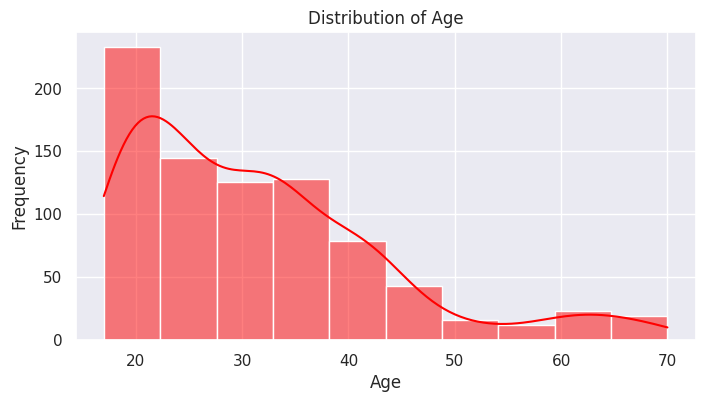

In [21]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'],bins=10,kde=True,color='red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-2358380737.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_watch = df.groupby('Age_Group')['TimeConsumingPerWeek'].mean().sort_values()


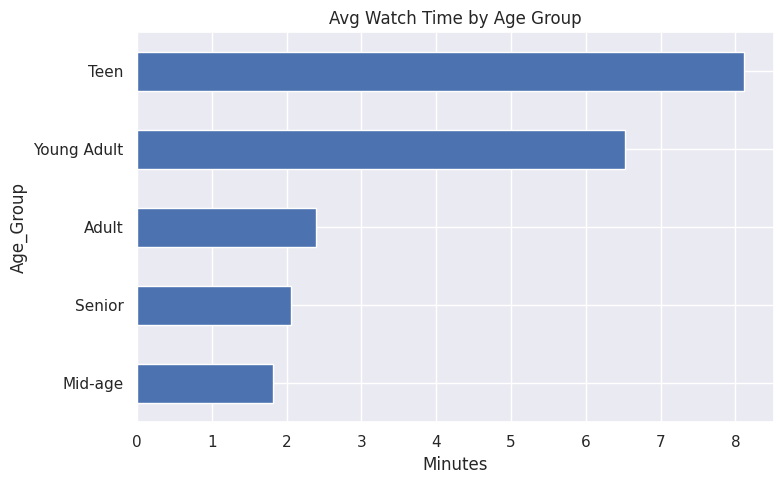

In [22]:
# --- PATTERN 1: Average Watch Time by Age Group ---
if 'Age' in df.columns:
    df['Age_Group'] = pd.cut(df['Age'], bins=[0,18,30,45,60,100],
                             labels=['Teen','Young Adult','Adult','Mid-age','Senior'])

    age_watch = df.groupby('Age_Group')['TimeConsumingPerWeek'].mean().sort_values()

    # VISUALISE
    plt.figure(figsize=(8,5))
    age_watch.plot(kind='barh', title='Avg Watch Time by Age Group')
    plt.xlabel('Minutes')
    plt.tight_layout()
    plt.show()

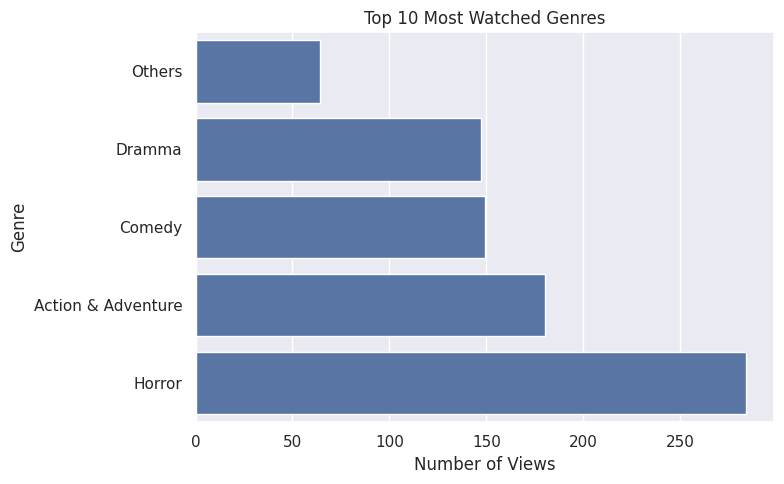

In [23]:
if 'Genre' in df.columns:
    genre_counts = df['Genre'].value_counts().head(10).sort_values()

    # VISUALISE
    plt.figure(figsize=(8,5))
    sns.barplot(x=genre_counts.values, y=genre_counts.index)
    plt.title('Top 10 Most Watched Genres')
    plt.xlabel('Number of Views')
    plt.tight_layout()
    plt.show()

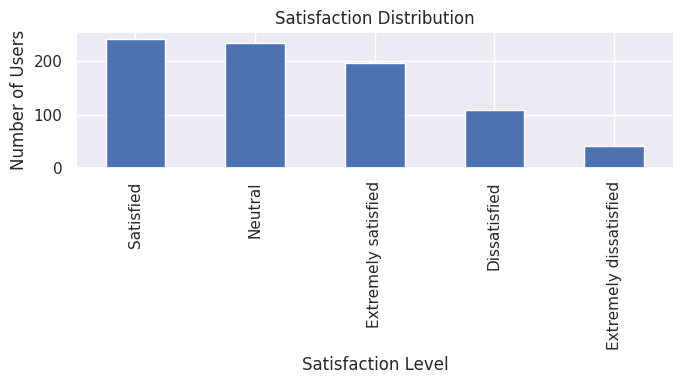

In [24]:
if 'Satisfaction' in df.columns:
    plt.figure(figsize=(7, 4))
    df['Satisfaction'].value_counts().plot(kind='bar')
    plt.title('Satisfaction Distribution')
    plt.xlabel('Satisfaction Level')
    plt.ylabel('Number of Users')
    plt.tight_layout()
    plt.show()

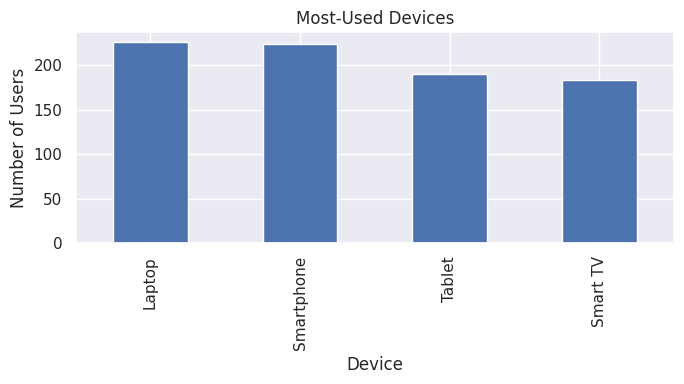

In [25]:
if 'Device' in df.columns:
    plt.figure(figsize=(7, 4))
    df['Device'].value_counts().plot(kind='bar')
    plt.title('Most-Used Devices')
    plt.xlabel('Device')
    plt.ylabel('Number of Users')
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-2098340142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


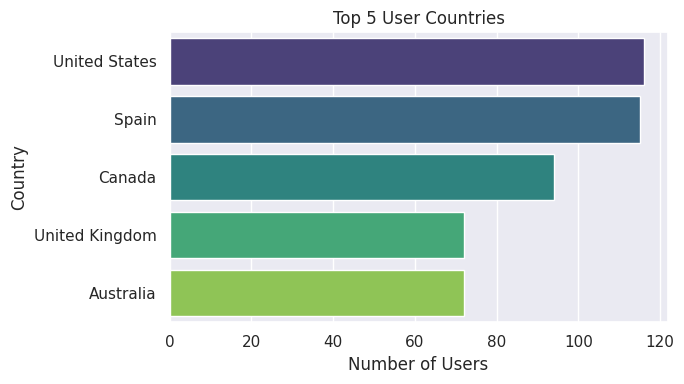

In [26]:
if 'Country' in df.columns:
    top_countries = df['Country'].value_counts().head(5)
    plt.figure(figsize=(7, 4))
    sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
    plt.title('Top 5 User Countries')
    plt.xlabel('Number of Users')
    plt.ylabel('Country')
    plt.tight_layout()
    plt.show()